## Problem 2
$$ f\ =\ \frac{1}{15}\sum_{k=0}^{n}\left(-1\right)^{k}\left(\frac{\left(2n+1\right)!}{\left(2n-2k\right)!\left(2k+1\right)!}\right)\left(1-x^{2}\right)^{\left(n-k\right)}\cdot x^{2k},\quad n=9 $$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams.update({'font.size': 13})
# %config InlineBackend.close_figures=False # keep figures open in pyplot

## Plotting the function
$$ F(x)\ =\ \frac{1}{15}\sum_{k=0}^{n}\left(-1\right)^{k}\left(\frac{\left(2n+1\right)!}{\left(2n-2k\right)!\left(2k+1\right)!}\right)\left(1-x^{2}\right)^{\left(n-k\right)}\cdot x^{2k}, \quad n=9 $$

In [2]:
def plot_nlf(limit=[-1, 1, -0.5, 1.5]):
    def load(x, n=9):
        def const_term(n, k): return (1/15)*((-1)**k)*(math.factorial(2*n+1)/(math.factorial(2*n-2*k)*math.factorial(2*k+1)))
        def variable_term(n, k, x): return (1-x**2)**(n-k)*(x**(2*k))
        y = 0
        for k in range(0, n+1):
            y = y + const_term(n, k)*variable_term(n, k, x)
        return y

    f = np.vectorize(load)
    x = np.linspace(-1, 1, 500)
    y = f(x)
    plt.plot(x, y, 'tab:blue', linewidth=2)
    plt.xlim(limit[0], limit[1])
    plt.ylim(limit[2], limit[3])
    plt.title('f=F(x) Plot')
    plt.xlabel('x')
    plt.ylabel('f')
    plt.axvline(c="black", lw=1, ls='--')
    plt.axhline(c="black", lw=1, ls='--')
    ax = plt.gca()
    ax.set_aspect('equal')


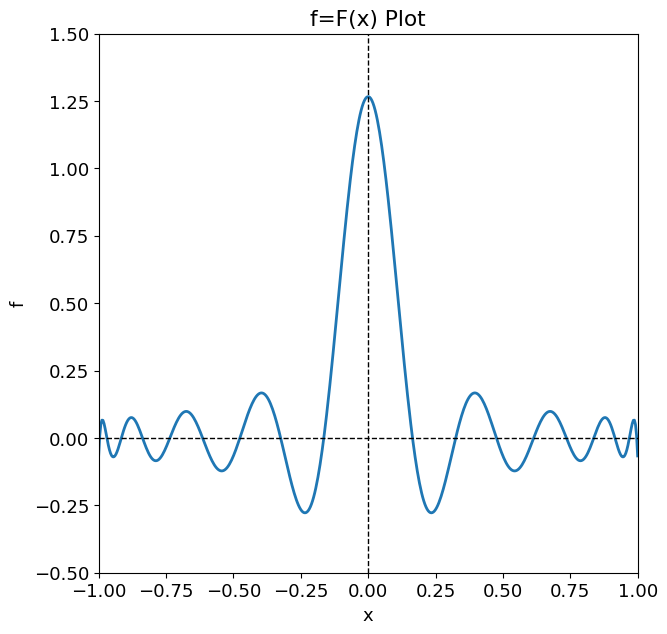

In [3]:
plot_nlf()

## Given f -> x?
$$
F(x)\approx F_L(x) = c_1+c_2x \implies F_L(x)=\big(F(x_0)-F'(x_0)*x_0\big)+F'(x_0)*x
$$
$$
F(x) \equiv f=\frac{1}{15}\sum_{k=0}^{n}\left(-1\right)^{k}\left(\frac{\left(2n+1\right)!}{\left(2n-2k\right)!\left(2k+1\right)!}\right)\left(1-x^{2}\right)^{\left(n-k\right)}\cdot x^{2k}, \quad n=9
$$
$$
F'(x) \equiv f=\frac{1}{15}\sum_{k=0}^{n}\left(-1\right)^{k}\left(\frac{\left(2n+1\right)!}{\left(2n-2k\right)!\left(2k+1\right)!}\right)\left(1-x^{2}\right)^{\left(n-k\right)}\cdot x^{2k}\cdot\left(\frac{2k}{x}-\frac{(n-k)(2x)}{1-x^2}\right), \quad n=9
$$

In [4]:
def Fdiff_nlinear(x, n=9):
    def const_term(n, k): return (1/15)*((-1)**k)*(math.factorial(2*n+1)/(math.factorial(2*n-2*k)*math.factorial(2*k+1)))
    def variable_term(n, k, x): return (1-x**2)**(n-k)*(x**(2*k))
    def diff_term(n,k,x): return ((2*k/x)-(((n-k)*2*x)/(1-x**2)))
    y = 0
    for k in range(0, n+1):
        y = y + const_term(n, k)*variable_term(n, k, x)*diff_term(n,k,x)
    return y


def F_nlinear(x, n=9):
    def const_term(n, k): return (1/15)*((-1)**k)*(math.factorial(2*n+1)/(math.factorial(2*n-2*k)*math.factorial(2*k+1)))
    def variable_term(n, k, x): return (1-x**2)**(n-k)*(x**(2*k))
    y = 0
    for k in range(0, n+1):
        y = y + const_term(n, k)*variable_term(n, k, x)
    return y

def F_linear(x_0, f): return (f-(F_nlinear(x_0)-Fdiff_nlinear(x_0)*x_0))/Fdiff_nlinear(x_0)

def f_line(f, xlim1, xlim2): return plt.plot(np.linspace(xlim1, xlim2, 100),
                                             np.full((100), f), '-k', linewidth=1.5)

def solve(x_initial=0.01, f=0.0001, plotarea=[-1, 1, -0.5, 1.5], view=True):
    x_coord = np.array([x_initial, x_initial])
    y_coord = np.array([0, F_nlinear(x_initial)])
    tolerance = 0.000001
    while True:
        x_sol = F_linear(x_coord[-1], f)
        x_coord = np.append(x_coord, x_sol)
        y_coord = np.append(y_coord, f)

        f_esti = F_nlinear(x_sol)
        x_coord = np.append(x_coord, x_sol)
        y_coord = np.append(y_coord, f_esti)

        error = abs((f-f_esti)/f)
        if error <= tolerance:
            if view == True:
                print("Solution is : x = %f" % (x_sol))
                print("Corresponding 'f' = %f" % (F_nlinear(x_sol)))
            break
        elif x_coord.size/2 > 200:
            x_sol = None
            x_coord[-1] = x_sol
            if view == True:
                print("Warning! maximum allowed no of iterations reached")
            break
    if view == True:
        plot_nlf(plotarea)
        f_line(f, plotarea[0], plotarea[1])
        plt.plot(x_coord, y_coord, 'o-r', linewidth=1, ms=2)
        plt.plot(x_coord[0],y_coord[0],'ob', ms=10, label='initial guess')
        plt.plot(x_coord[-1],y_coord[-1],'og', ms=10, label='obtained solution')
        plt.axvline(c="black",lw=1,ls='--')
        plt.axhline(c="black",lw=1,ls='--')
        # print(x_sol)
        print("Number of iterations = %d" % ((x_coord.size)/2-1))
    else:
        return x_sol

### Examples

Solution is : x = 0.837203
Corresponding 'f' = 0.000100
Number of iterations = 4


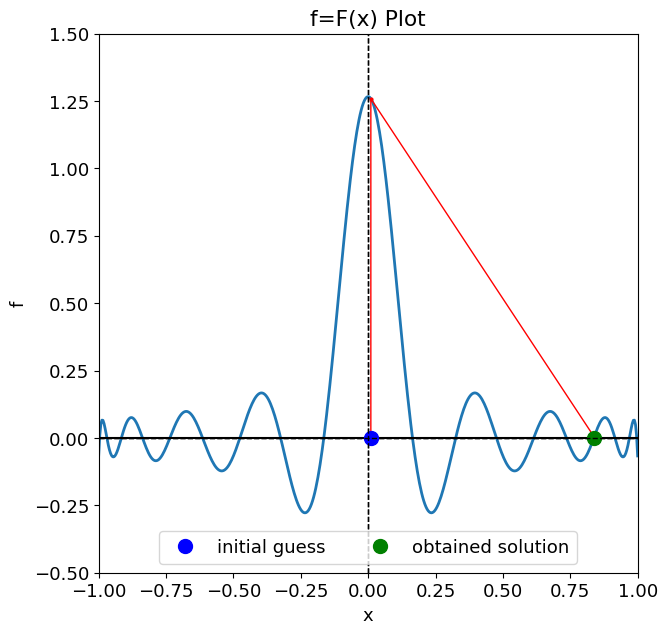

In [5]:
solve(x_initial=0.01, f=0.0001, plotarea=[-1, 1, -0.5, 1.5])
plt.legend(loc='lower center', ncol=3)

Solution is : x = -0.735685
Corresponding 'f' = 0.000100
Number of iterations = 4


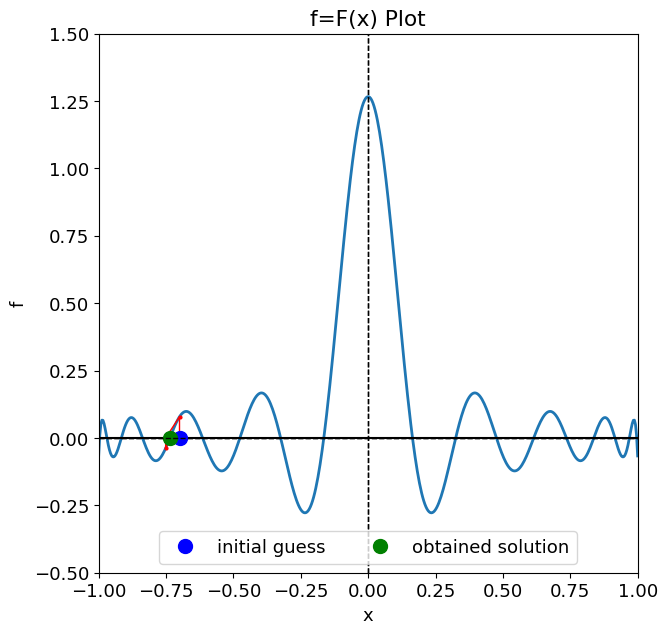

In [6]:
solve(x_initial=-0.7, f=0.0001, plotarea=[-1, 1, -0.5, 1.5])
plt.legend(loc='lower center', ncol=3)

Solution is : x = -0.136611
Corresponding 'f' = 0.250000
Number of iterations = 7


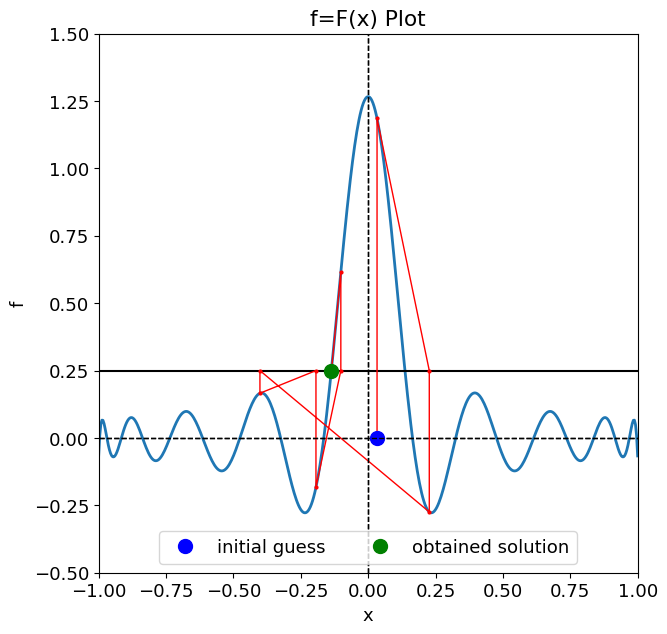

In [7]:
solve(x_initial=0.033, f=0.25, plotarea=[-1, 1, -0.5, 1.5])
plt.legend(loc='lower center', ncol=3)

Warning! maximum allowed no of iterations reached
Number of iterations = 200


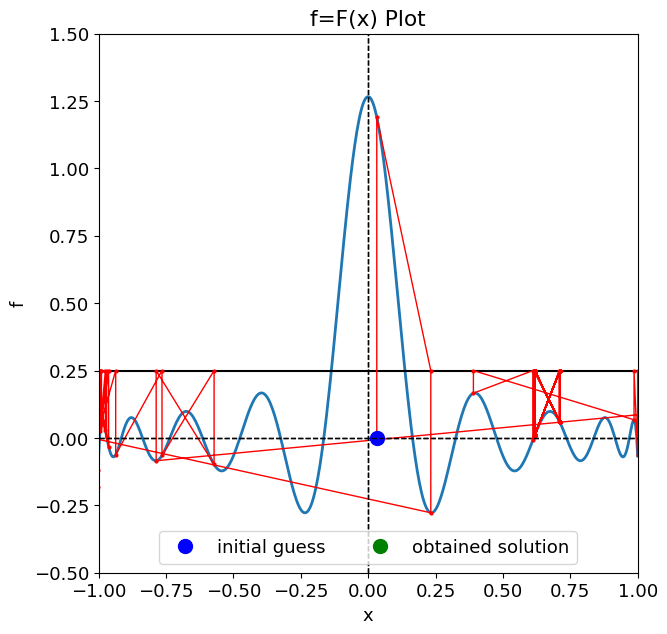

In [8]:
solve(x_initial=0.032, f=0.25, plotarea=[-1, 1, -0.5, 1.5])
plt.legend(loc='lower center', ncol=3)

## Plotting the solution curve

In [9]:
def plotsol(a):
    f_grid = np.linspace(-0.5, 1.5, 300)
    x_grid = np.array([])
    for fi in f_grid:
        x_new = solve(x_initial=a, f=fi, view=False)
        # if x_new == None:
        #     break
        x_grid = np.append(x_grid, x_new)
    plt.plot(x_grid, f_grid[0:len(x_grid)], '.')
    plt.plot(a, 0, 'ob', ms=5, label='initial guess')
    plt.axvline(c="black", lw=1, ls='--')
    plt.axhline(c="black", lw=1, ls='--')
    limit = [-1, 1, -0.5, 1.5]
    plt.xlim(limit[0], limit[1])
    plt.ylim(limit[2], limit[3])
    plt.title('f=F(x) Solution Plot')
    plt.xlabel('x')
    plt.ylabel('f')
    ax = plt.gca()
    ax.set_aspect('equal')

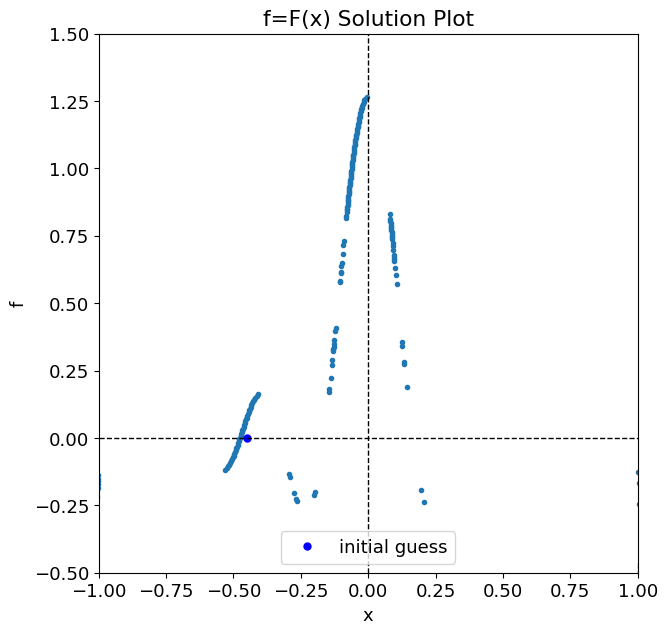

In [10]:
plotsol(-0.45)
plt.legend(loc='lower center', ncol=3)

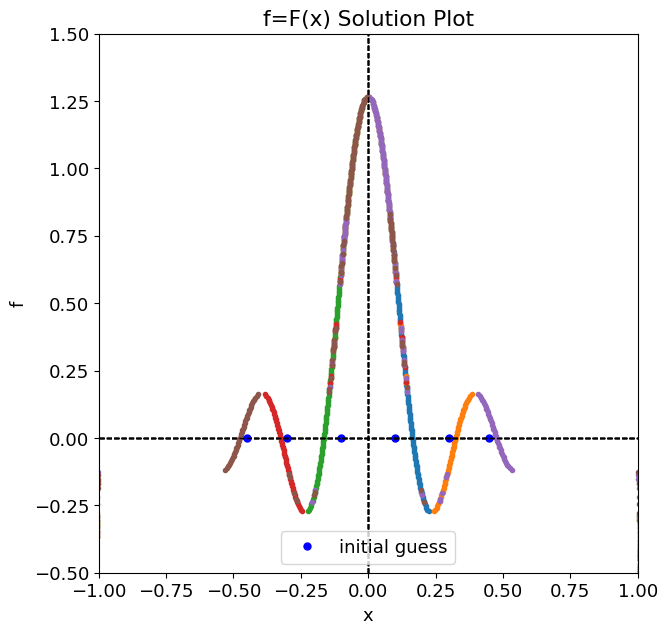

In [11]:
plotsol(0.1)
plt.legend(loc='lower center', ncol=3)
plotsol(0.3)
plotsol(-0.1)
plotsol(-0.3)
plotsol(0.45)
plotsol(-0.45)